In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
plt.style.use("fivethirtyeight")

In [3]:
# from skimage import img_as_ubyte

In [4]:
def show_images(img_arr, cmap=None):
    plt.figure(figsize=(12,7))
    plt.axis('off')
    plt.grid(False)
    if cmap is not None:
        plt.imshow(img_arr, cmap=cmap)
    else:
        plt.imshow(img_arr)
        
    plt.show()

In [5]:
from sklearn.datasets import load_sample_images
# Load sample images
china, flower = load_sample_images().images


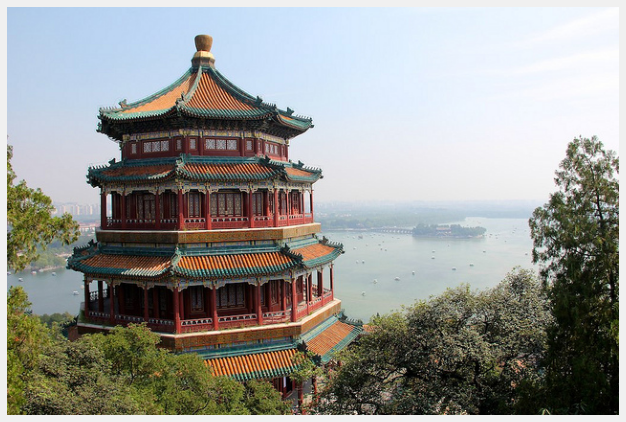

In [6]:

show_images(china)

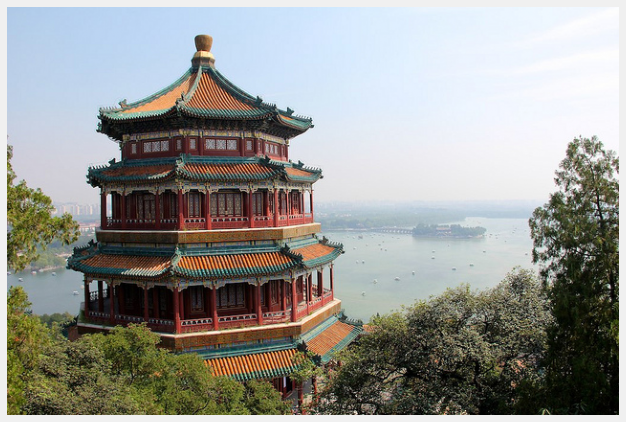

In [7]:
show_images(china/255)

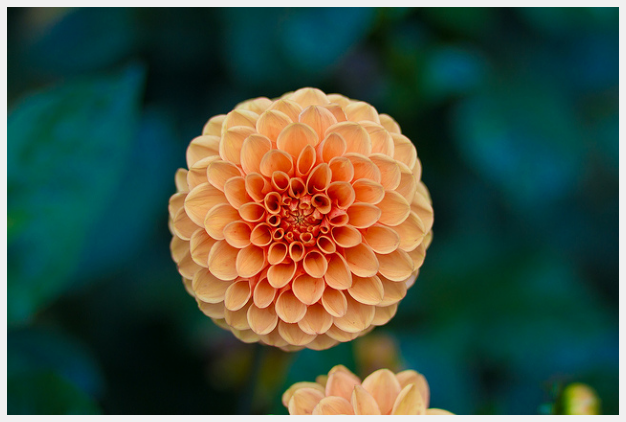

In [8]:
show_images(flower)

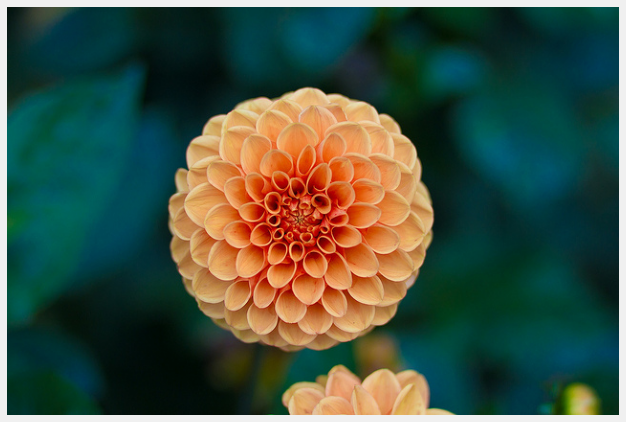

In [9]:
show_images(flower/255)

In [10]:
images = np.array([china/255, flower/255])
batch_size, height, width, channels = images.shape


print(f"batch_size: {batch_size}, height: {height}, width: {width}, channels: {channels}")

batch_size: 2, height: 427, width: 640, channels: 3


In [11]:

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line



In [12]:
filters[:, :, :, 0].shape

(7, 7, 3)

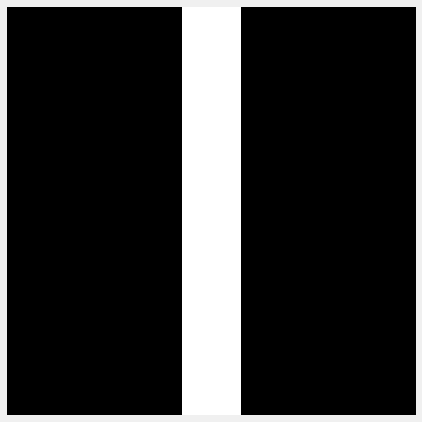

In [13]:
show_images(filters[:, :, :, 0])

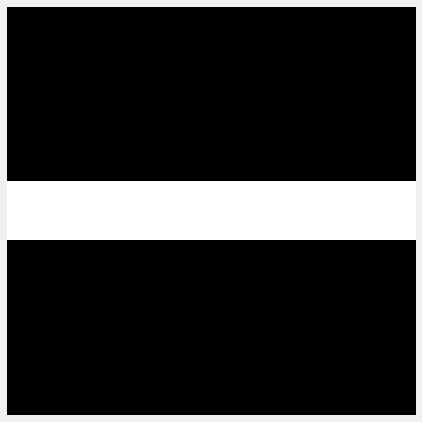

In [14]:
show_images(filters[:, :, :, 1], cmap="gray")

In [15]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")


In [16]:
outputs.shape

TensorShape([2, 427, 640, 2])

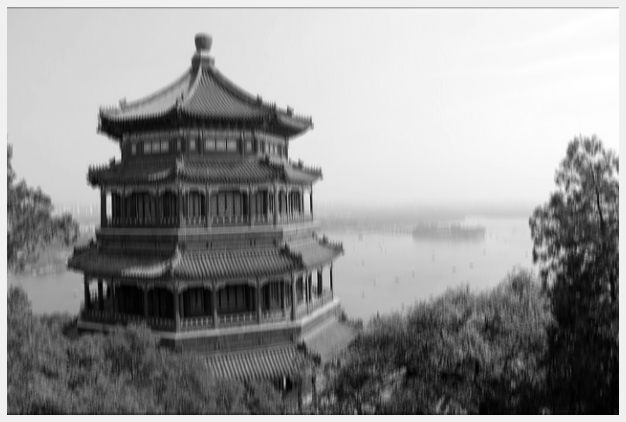

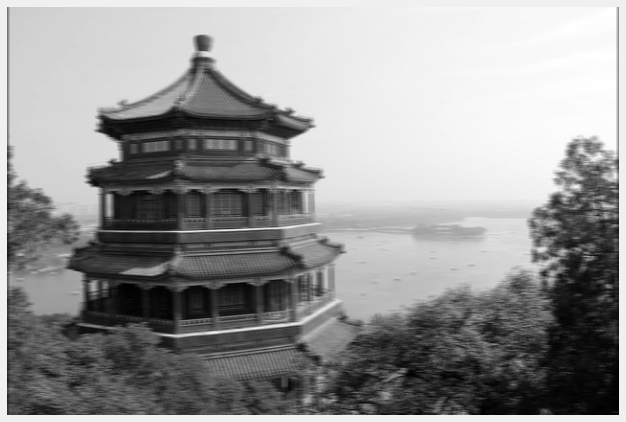

In [17]:
show_images(outputs[0, :, :, 0], cmap="gray")
show_images(outputs[0, :, :, 1], cmap="gray")



### Crop to the bounding box
```python
tf.image.crop_to_bounding_box(
    image, offset_height, offset_width, target_height, target_width
)
```

Args|_
-|-
image|4-D Tensor of shape [batch, height, width, channels] or 3-D Tensor of shape [height, width, channels].
offset_height|Vertical coordinate of the top-left corner of the result in the input.
offset_width|Horizontal coordinate of the top-left corner of the result in the input.
target_height|Height of the result.
target_width|Width of the result.

| Returns |
|:-|
|If image was 4-D, a 4-D float Tensor of shape [batch, target_height, target_width, channels] If image was 3-D, a 3-D float Tensor of shape [target_height, target_width, channels]|


[reference](https://www.tensorflow.org/api_docs/python/tf/image/crop_to_bounding_box)


In [18]:
def crop_center(image):
    """Returns a cropped square image."""
    shape = image.shape
    new_shape = min(shape[1], shape[2])
    offset_y = max(shape[1] - shape[2], 0) // 2
    offset_x = max(shape[2] - shape[1], 0) // 2
    image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
    return image

In [19]:
def more_crop(img):
    return img[150:220, 130:250]

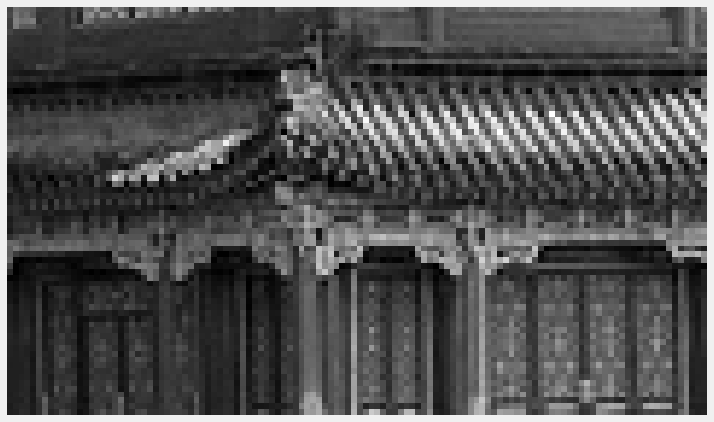

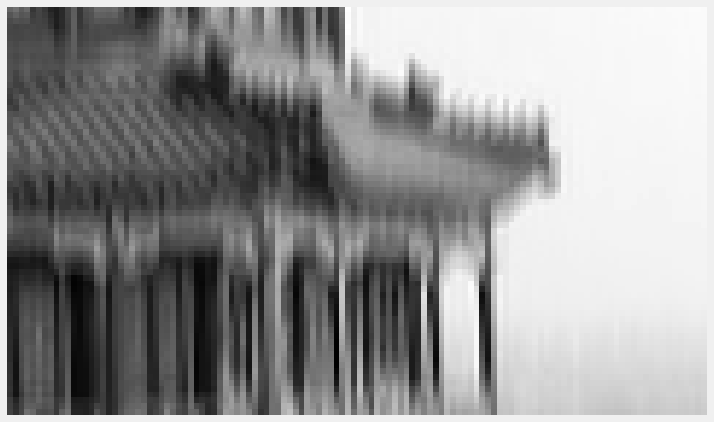

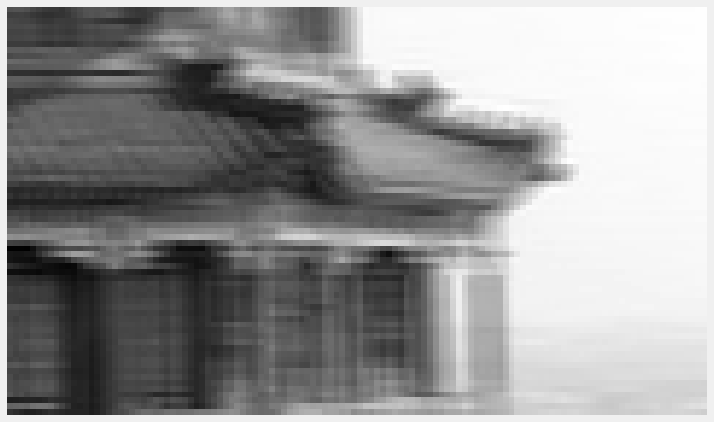

In [20]:
show_images(more_crop(images[0, :, :, 0]), cmap="gray")

for feature_map in range(2):
    show_images(more_crop(crop_center(outputs)[0, :,:,feature_map]), cmap="gray")

In [21]:
pooling = keras.layers.MaxPool2D(pool_size=2)

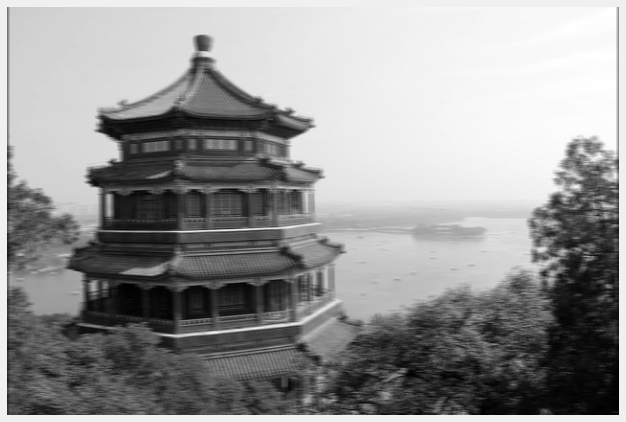


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



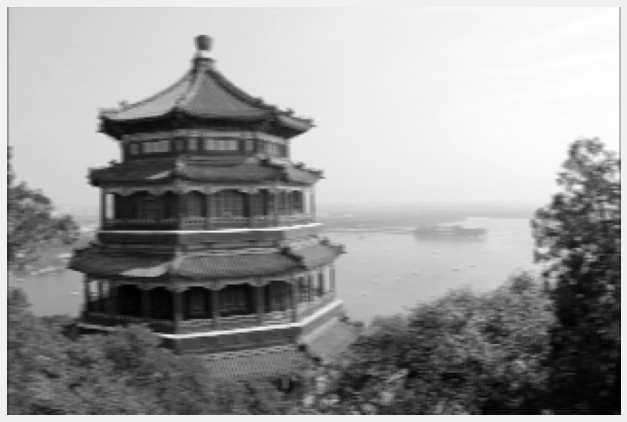

In [22]:
show_images(outputs[0,:,:,1], cmap="gray")
show_images(pooling(outputs)[0,:,:,1], cmap="gray")

In [23]:
outputs[0,:,:,1].shape

TensorShape([427, 640])

In [24]:
pooling(outputs)[0,:,:,1].shape

TensorShape([213, 320])

### GlobalAvgPooling

![](https://www.researchgate.net/publication/340076331/figure/fig1/AS:871542984552450@1584803448746/Extraction-of-features-from-a-fashion-image-using-a-global-average-pooling-layer.jpg)